In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


In [13]:
flowers = pd.read_csv('IrisFlowerDataset.csv')

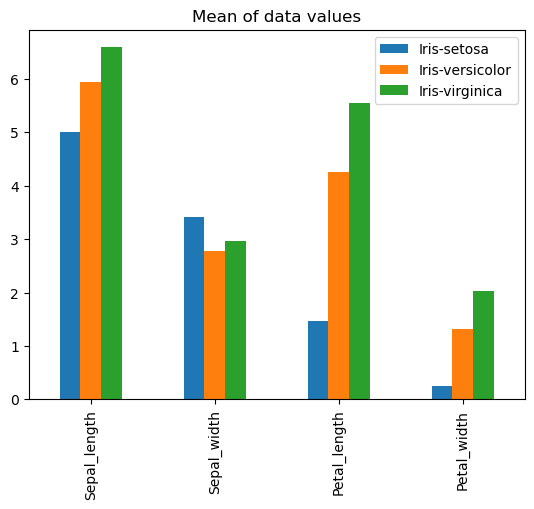

In [14]:
setosa = [flowers.loc[flowers['species'] == 'Iris-setosa', 'sepal_length'].mean(),
          flowers.loc[flowers['species'] == 'Iris-setosa', 'sepal_width'].mean(),
          flowers.loc[flowers['species'] == 'Iris-setosa', 'petal_length'].mean(),
          flowers.loc[flowers['species'] == 'Iris-setosa', 'petal_width'].mean()]

versicolor = [flowers.loc[flowers['species'] == 'Iris-versicolor', 'sepal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-versicolor', 'sepal_width'].mean(),
             flowers.loc[flowers['species'] == 'Iris-versicolor', 'petal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-versicolor', 'petal_width'].mean()]

virginica = [flowers.loc[flowers['species'] == 'Iris-virginica', 'sepal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-virginica', 'sepal_width'].mean(),
             flowers.loc[flowers['species'] == 'Iris-virginica', 'petal_length'].mean(),
             flowers.loc[flowers['species'] == 'Iris-virginica', 'petal_width'].mean()]

df = pd.DataFrame({"Iris-setosa":setosa,
       "Iris-versicolor": versicolor,
       "Iris-virginica": virginica},
      index = ["Sepal_length","Sepal_width","Petal_length","Petal_width"])

df.plot(kind = 'bar')
plt.title('Mean of data values')
plt.show()

In [15]:
X = flowers[['sepal_length','sepal_width','petal_length','petal_width']]
y = flowers['species']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.27,
                                                    random_state = 1)

In [16]:
rf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    min_samples_split = 2
)
rf.fit(X_train, y_train)

RandomForestClassifier()

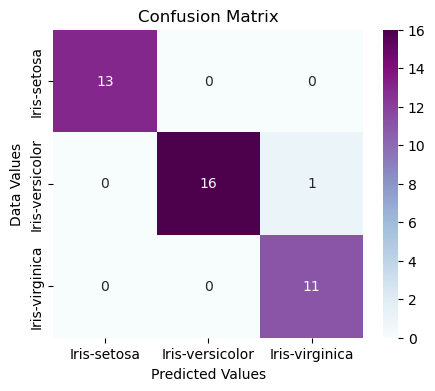

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
             index = flowers["species"].unique(),
             columns = flowers["species"].unique())
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap = 'BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Data Values')
plt.xlabel('Predicted Values')
plt.show()

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of this model is: {accuracy}")

The accuracy of this model is: 0.975609756097561


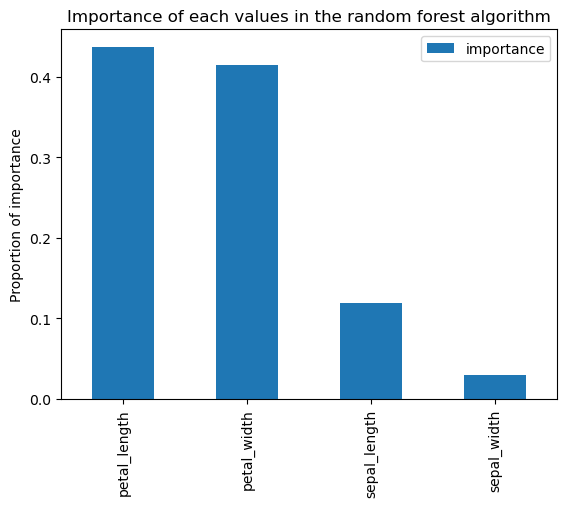

In [19]:
importance = pd.DataFrame(rf.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)
importance.plot(kind='bar')
plt.ylabel('Proportion of importance')
plt.title('Importance of each values in the random forest algorithm')
plt.show()

In [20]:
# The following code will test a multitude of ultra parameters in order for the program to be more accurate
# The code can be tried but its useless and time taking to get results
# So the important results will be noted below

In [21]:
"""
maxi = 0
imax = 0
jmax = 0
for i in range(1,500):
    for j in range(2,65):
        rf = RandomForestClassifier(
                n_estimators = i,
                max_depth = None,
                min_samples_split = j
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if(accuracy > maxi):
            maxi = accuracy
            imax = i
            jmax = j
        print(f"i = {i}, j = {j}, accuracy = {accuracy}")
        print(f"accuracy max = {maxi}\nimax = {imax}\njmax = {jmax}\n")  
        
"""

'\nmaxi = 0\nimax = 0\njmax = 0\nfor i in range(1,500):\n    for j in range(2,65):\n        rf = RandomForestClassifier(\n                n_estimators = i,\n                max_depth = None,\n                min_samples_split = j\n        )\n        rf.fit(X_train, y_train)\n        y_pred = rf.predict(X_test)\n        accuracy = accuracy_score(y_test, y_pred)\n        if(accuracy > maxi):\n            maxi = accuracy\n            imax = i\n            jmax = j\n        print(f"i = {i}, j = {j}, accuracy = {accuracy}")\n        print(f"accuracy max = {maxi}\nimax = {imax}\njmax = {jmax}\n")  \n        \n'

In [22]:
# after running this code for a while we can conclude that the best parameters gives only one error
#and can be found for many values such as : i = 100 and j = 2